<a href="https://colab.research.google.com/github/Fundkdh/algorithm-2022/blob/main/06_jan_%EC%A1%B0%EB%B3%84%ED%99%9C%EB%8F%99.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##조별 활동_변수 추출


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv("/content/drive/MyDrive/Ashopping2.csv",encoding="cp949")
data

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,...,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
0,1,0,4007080,17,235711,1,5445,1,4,0,...,6,7,6,6,6,6,6,6,6,6
1,2,1,3168400,14,226314,22,350995,2,4,0,...,7,7,6,6,6,5,3,6,6,6
2,3,0,2680780,18,148932,6,186045,1,4,1,...,6,6,6,6,6,7,7,6,6,7
3,4,0,5946600,17,349800,1,5195,1,4,1,...,6,6,5,6,6,6,6,6,5,6
4,5,0,13745950,73,188301,9,246350,1,2,0,...,5,6,6,6,5,5,6,6,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,5135090,8,641886,3,44445,1,3,1,...,6,6,7,6,7,6,6,6,6,6
996,997,0,10315690,49,210524,6,186545,1,2,0,...,6,7,6,5,6,5,7,6,6,6
997,998,0,2741290,10,274129,8,260700,2,4,0,...,5,6,6,6,5,6,4,5,6,5
998,999,0,11268990,15,751266,20,347700,1,3,0,...,5,4,4,4,4,4,5,5,4,4


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data.isnull().sum()

고객ID                  0
이탈여부                  0
총_매출액                 0
방문빈도                  0
1회_평균매출액              0
할인권_사용 횟수             0
총_할인_금액               0
고객등급                  0
구매유형                  0
클레임접수여부               0
구매_카테고리_수             0
거주지역                  0
성별                    0
고객_나이대                0
거래기간                  0
할인민감여부                0
멤버쉽_프로그램_가입전_만족도      0
멤버쉽_프로그램_가입후_만족도      0
Recency               0
Frequency             0
Monetary              0
상품_만족도                0
매장_만족도                0
서비스_만족도               0
상품_품질                 0
상품_다양성                0
가격_적절성                0
상품_진열_위치             66
상품_설명_표시            138
매장_청결성                0
공간_편의성                0
시야_확보성                0
음향_적절성                0
안내_표지판_설명             0
친절성                   0
신속성                   0
책임성                   0
정확성                   0
전문성                   0
dtype: int64

In [5]:
data.dropna(axis=0,inplace=True)
#inplace=True → dropna한 데이터를 프레임 안으로 넣을 것을 지정

In [6]:
from sklearn.feature_selection import SelectKBest,chi2

#데이터 지정(변수)
X=data.drop(["고객ID","친절성"],axis=1)
Y=data["친절성"]

#데이터 분할
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

#일변량 통계기반 변수 선택
selector=SelectKBest()
selector.fit(X_train,Y_train)

score=pd.DataFrame()
score["Chi2"]=selector.scores_
score["p-value"]=selector.pvalues_
score["support"]=selector.get_support()
score["attribute"]=X_train.columns
score[score["support"]==True]

,Chi2,p-value,support,attribute
24,9.939681,8.722440e-08,True,상품_다양성
25,11.873868,2.792788e-09,True,가격_적절성
27,9.478387,1.985858e-07,True,상품_설명_표시
29,13.893850,7.836666e-11,True,공간_편의성
30,11.349794,7.084399e-09,True,시야_확보성
32,25.474222,1.797690e-19,True,안내_표지판_설명
33,45.708827,2.068609e-33,True,신속성
34,22.549852,2.461308e-17,True,책임성
35,32.863328,9.918917e-25,True,정확성
36,47.079122,2.645028e-34,True,전문성


In [7]:
#모형기반 선택

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

selector=SelectFromModel(RandomForestClassifier(n_estimators=100,random_state=0),threshold="median")
selector.fit(X_train,Y_train)

score=pd.DataFrame()
score["attribute"]=X_train.columns
score["support"]=selector.get_support()
score[score["support"]==True]

,attribute,support
1,총_매출액,True
2,방문빈도,True
3,1회_평균매출액,True
5,총_할인_금액,True
13,거래기간,True
15,멤버쉽_프로그램_가입전_만족도,True
20,상품_만족도,True
24,상품_다양성,True
25,가격_적절성,True
26,상품_진열_위치,True


In [8]:
data.describe

<bound method NDFrame.describe of      고객ID  이탈여부     총_매출액  방문빈도  1회_평균매출액  할인권_사용 횟수  총_할인_금액  고객등급  구매유형  \
0       1     0   4007080    17    235711          1     5445     1     4   
3       4     0   5946600    17    349800          1     5195     1     4   
4       5     0  13745950    73    188301          9   246350     1     2   
5       6     0   3323610    26    127831         20   348145     1     4   
6       7     0   2369340     6    394890         30   380945     1     1   
..    ...   ...       ...   ...       ...        ...      ...   ...   ...   
994   995     0  12390390    20    619520         23   380395     1     3   
995   996     0   5135090     8    641886          3    44445     1     3   
996   997     0  10315690    49    210524          6   186545     1     2   
998   999     0  11268990    15    751266         20   347700     1     3   
999  1000     0   3182880    23    138386         19   367045     1     4   

     클레임접수여부  ...  매장_청결성  공간_편의성  시야_확보성

In [9]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

X_train_under, Y_train_under = RandomUnderSampler(random_state=0).fit_resample(X_train, Y_train)

print("orginal data %s" %Counter(Y))
print("orginal train data %s" %Counter(Y_train))
print("under train data %s" %Counter(Y_train_under))

orginal data Counter({6: 311, 5: 296, 4: 143, 7: 76, 3: 15})
orginal train data Counter({6: 221, 5: 207, 4: 98, 7: 51, 3: 11})
under train data Counter({3: 11, 4: 11, 5: 11, 6: 11, 7: 11})


In [10]:
from imblearn.over_sampling import SMOTE
X_train_over , Y_train_over = SMOTE(random_state=0).fit_resample(X_train, Y_train)

print("orginal data %s" %Counter(Y))
print("orginal train data %s" %Counter(Y_train))
print("over train data %s" %Counter(Y_train_over))

orginal data Counter({6: 311, 5: 296, 4: 143, 7: 76, 3: 15})
orginal train data Counter({6: 221, 5: 207, 4: 98, 7: 51, 3: 11})
over train data Counter({5: 221, 4: 221, 6: 221, 3: 221, 7: 221})


In [11]:
import seaborn as sns
import numpy as np

In [13]:
data["방문빈도"].describe()

count    841.000000
mean      26.217598
std       20.886860
min        2.000000
25%       13.000000
50%       21.000000
75%       32.000000
max      203.000000
Name: 방문빈도, dtype: float64

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48169 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48712 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48169 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48712 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)


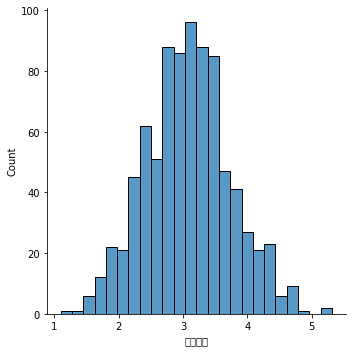

In [14]:
data["방문빈도"] =np.log1p(data["방문빈도"])
sns.displot(data["방문빈도"])
